In [2]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
from numpy import pi

In [18]:
# Addition Circuit

# Initilization
size = 4
a = "0001"
b = "1101"
regA = QuantumRegister(size+1, name='a')
regB = QuantumRegister(size+1, name='b')
output = ClassicalRegister(size+1, 'sum')
qc = QuantumCircuit(regA, regB, output)

setBits(qc, size, a, b, regA, regB)
# qftA(qc, regA, size+1)
for i in range(0, size+1):
    createInputState(qc, regA, size-i)
for i in range(0, size+1):
    regRotation(qc, regA, regB, size-i)
# iQftA(qc, regA, size+1)
for i in range(0, size+1):
    createInputState(qc, regA, i)
qc.measure(regA, output)
qc.draw()

┌───┐                                                            »
  a_0: ┤ X ├──────────────────────────────────────■─────────────────────»
       └───┘                                      │                     »
  a_1: ───────────────────────────■───────────────┼────────■────────────»
                                  │               │        │       ┌───┐»
  a_2: ─────────────■─────────────┼────────■──────┼────────┼───────┤ H ├»
                    │       ┌───┐ │        │P(π)  │        │P(π/2) └───┘»
  a_3: ──────■──────┼───────┤ H ├─┼────────■──────┼────────■────────────»
       ┌───┐ │P(π)  │P(π/2) └───┘ │P(π/4)         │P(π/8)          ┌───┐»
  a_4: ┤ H ├─■──────■─────────────■───────────────■─────────■──────┤ H ├»
       ├───┤                                                │      └───┘»
  b_0: ┤ X ├────────────────────────────────────────────────┼───────────»
       └───┘                                                │           »
  b_1: ─────────────────────────────────────────────────────┼───────────»
       ┌───┐                                                │           »
  b_2: ┤ X ├────────────────────────────────────────────────┼───────────»
       ├───┤                                                │           »
  b_3: ┤ X ├────────────────────────────────────────────────┼───────────»
       └───┘                                                │P(π)       »
  b_4: ─────────────────────────────────────────────────────■───────────»
                                                                        »
sum: 5/═════════════════════════════════════════════════════════════════»
                                                                        »
«                                                      ┌───┐                 »
«  a_0: ─■─────────────────■──────────────────■────────┤ H ├────────■────────»
«        │                 │         ┌───┐    │P(π)    └───┘        │        »
«  a_1: ─┼─────────■───────┼─────────┤ H ├────■───────■─────────────┼────────»
«        │         │P(π)   │P(π/2)   └───┘            │             │        »
«  a_2: ─┼─────────■───────■────────■────────■────────┼─────────────┼────────»
«        │P(π/4)                    │        │        │       ┌───┐ │        »
«  a_3: ─■────────■─────────■───────┼────────┼────────┼───────┤ H ├─┼────────»
«                 │         │       │        │        │       └───┘ │        »
«  a_4: ──────────┼─────────┼───────┼────────┼────────┼─────────────┼────────»
«                 │         │       │        │        │             │        »
«  b_0: ──────────┼─────────┼───────┼────────┼────────┼─────────────┼────────»
«                 │         │       │        │        │             │        »
«  b_1: ──────────┼─────────┼───────┼────────┼────────┼─────────────┼────────»
«                 │         │       │        │        │             │        »
«  b_2: ──────────┼─────────┼───────┼────────┼────────┼─────────────┼────────»
«                 │         │P(π)   │        │P(π/2)  │             │        »
«  b_3: ──────────┼─────────■───────┼────────■────────┼─────────────┼────────»
«                 │P(π/2)           │P(π/4)           │P(π/8)       │P(π/16) »
«  b_4: ──────────■─────────────────■─────────────────■─────────────■────────»
«                                                                            »
«sum: 5/═════════════════════════════════════════════════════════════════════»
«                                                                            »
«                                                                            »
«  a_0: ─────────────────■──────────────────────■───────────────■────────────»
«                        │                      │               │       ┌───┐»
«  a_1: ─■───────────────┼────────■─────────────┼────────■──────┼───────┤ H ├»
«        │               │        │       ┌───┐ │        │      │       └───┘»
«  a_2: ─┼────────■──────┼────────┼───────┤ H ├─┼────────┼──────┼────────────»
«        │    

In [4]:
# Set Bits Function
def setBits(qc, size, a, b, regA, regB):
    #Flip the corresponding qubit in register a if a bit in the 
    #string first is a 1
    for i in range(0, size):
        if a[i] == "1":
            qc.x(regA[size-(i+1)])    #Flip the corresponding qubit in register b if a bit in the 
    #string second is a 1
    for i in range(0, size):
        if b[i] == "1":
            qc.x(regB[size-(i+1)])

In [13]:
# QFT A
def qftA(qc, regA, size):
    qft = QFT(size, do_swaps=False)
    qc.append(qft, regA)

In [6]:
# Rotate A based on B
def regRotation(qc, regA, regB, size):
        for i in range(0, size+1):
            qc.cp(pi/float(2**(i)), regA[size-i], regB[size])

In [14]:
# IQFT A
def iQftA(qc, regA, size):
    qft = QFT(size, inverse=True, do_swaps=False)
    qc.append(qft, regA)

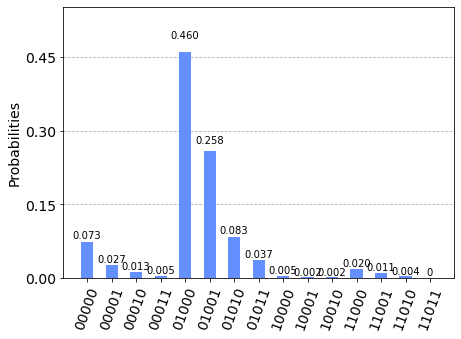

In [19]:
# Measure
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(qc, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

In [17]:
def createInputState(qc, reg, n):
    qc.h(reg[n])
    for i in range(0, n):
        qc.cp(pi/float(2**(i)), reg[n-(i+1)], reg[n])
        
def inverseQFT(qc, reg, n):
    for i in range(0, n):
        qc.cp(-1*pi/float(2**(n-i)), reg[i], reg[n])
    qc.h(reg[n])